In [1]:
import pandas as pd
import numpy as np
import pprint
import itertools
import pickle
import datetime as datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, precision_recall_curve,f1_score, fbeta_score, confusion_matrix, roc_curve, log_loss, make_scorer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from numpy import mean
from sklearn import svm, model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_validate

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier


plt.style.use('ggplot')

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv("./data/WA_cngstn.csv")

In [4]:
df.head()

,Type,Severity,TMC,StartTime(UTC),EndTime(UTC),LocationLat,LocationLng,Distance(mi),Side,ZipCode,IsAnomaly,Duration
0,3,1,74,2016-11-30 23:35:00,2016-12-01 00:55:09,47.01,-122.91,1.49,-1,98501.00,0,80
1,3,2,73,2016-12-01 00:52:00,2016-12-01 01:04:04,47.61,-122.33,1.49,-1,98104.00,0,12
2,3,1,74,2016-12-01 01:08:00,2016-12-01 01:26:07,47.96,-122.20,2.30,-1,98203.00,0,18
3,3,1,74,2016-12-01 01:02:00,2016-12-01 01:24:00,47.56,-122.19,2.59,-1,98006.00,0,22
4,3,1,74,2016-12-01 01:19:00,2016-12-01 01:31:07,47.62,-122.33,1.64,-1,98101.00,0,12


In [5]:
len(df)

558781

In [6]:
df_graph = df.copy()
df_graph['StartTime(UTC)'] = pd.to_datetime(df_graph['StartTime(UTC)'])
dates = df_graph['StartTime(UTC)'].dt.date

In [7]:
df_2017 = df_graph[(dates>pd.Timestamp('2016-12-31').date()) & (dates<pd.Timestamp('2018-01-01'))]
df_2017.describe()

,Type,Severity,TMC,LocationLat,LocationLng,Distance(mi),Side,ZipCode,IsAnomaly,Duration
count,148689.00,148689.00,148689.00,148689.00,148689.00,148689.00,148689.00,148100.00,148689.00,148689.00
mean,3.00,1.78,73.17,47.48,-121.92,3.13,-0.65,98291.57,0.21,47.73
std,0.00,0.77,9.34,0.46,1.04,2.94,0.76,332.36,0.41,40.66
min,3.00,1.00,70.00,45.56,-124.40,0.00,-1.00,98001.00,0.00,10.00
25%,3.00,1.00,72.00,47.28,-122.33,1.26,-1.00,98056.00,0.00,37.00
50%,3.00,2.00,73.00,47.57,-122.26,2.39,-1.00,98144.00,0.00,42.00
75%,3.00,2.00,74.00,47.70,-122.11,3.98,-1.00,98390.00,0.00,49.00
max,3.00,3.00,1601.00,49.00,-117.04,42.35,1.00,99403.00,1.00,950.00


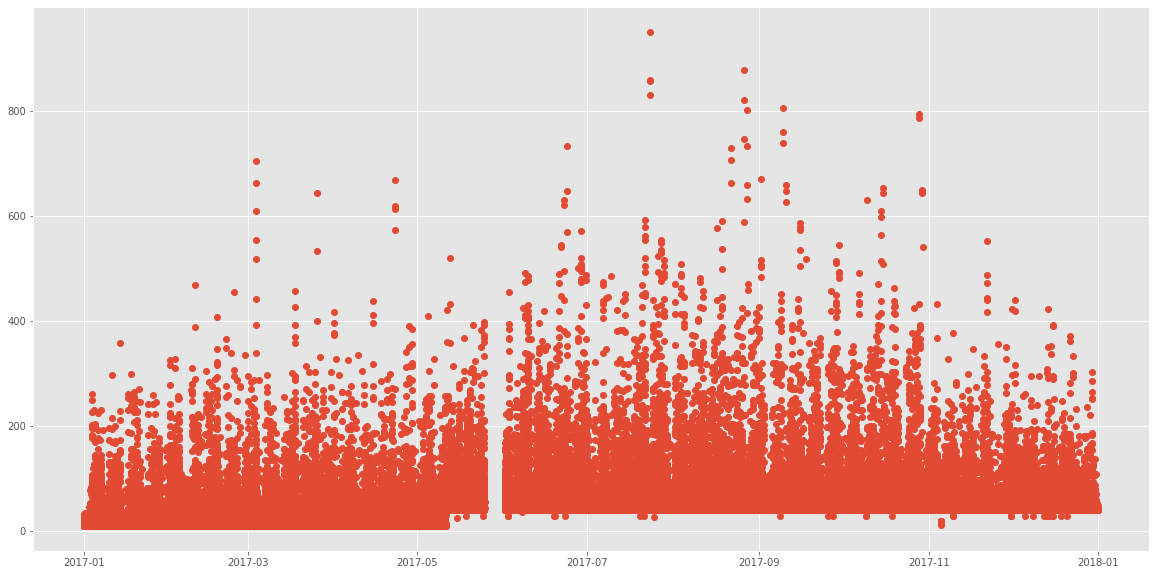

In [8]:
plt.figure(figsize=(20,10))
plt.plot_date(df_2017['StartTime(UTC)'], df_2017['Duration'])

In [9]:
df_2018 = df_graph[(dates>pd.Timestamp('2017-12-31').date()) & (dates<pd.Timestamp('2019-01-01'))]
df_2018.describe()

,Type,Severity,TMC,LocationLat,LocationLng,Distance(mi),Side,ZipCode,IsAnomaly,Duration
count,183388.00,183388.00,183388.00,183388.00,183388.00,183388.00,183388.00,183167.00,183388.00,183388.00
mean,3.00,1.79,73.08,47.53,-122.04,3.13,-0.65,98262.44,0.21,51.29
std,0.00,0.76,4.35,0.49,0.94,2.84,0.76,295.91,0.41,26.08
min,3.00,1.00,70.00,45.56,-124.41,0.00,-1.00,98001.00,0.00,12.00
25%,3.00,1.00,72.00,47.31,-122.33,1.28,-1.00,98055.00,0.00,42.00
50%,3.00,2.00,73.00,47.57,-122.26,2.48,-1.00,98134.00,0.00,43.00
75%,3.00,2.00,74.00,47.75,-122.18,3.98,-1.00,98372.00,0.00,49.00
max,3.00,3.00,1601.00,49.00,-117.04,43.62,1.00,99403.00,1.00,615.00


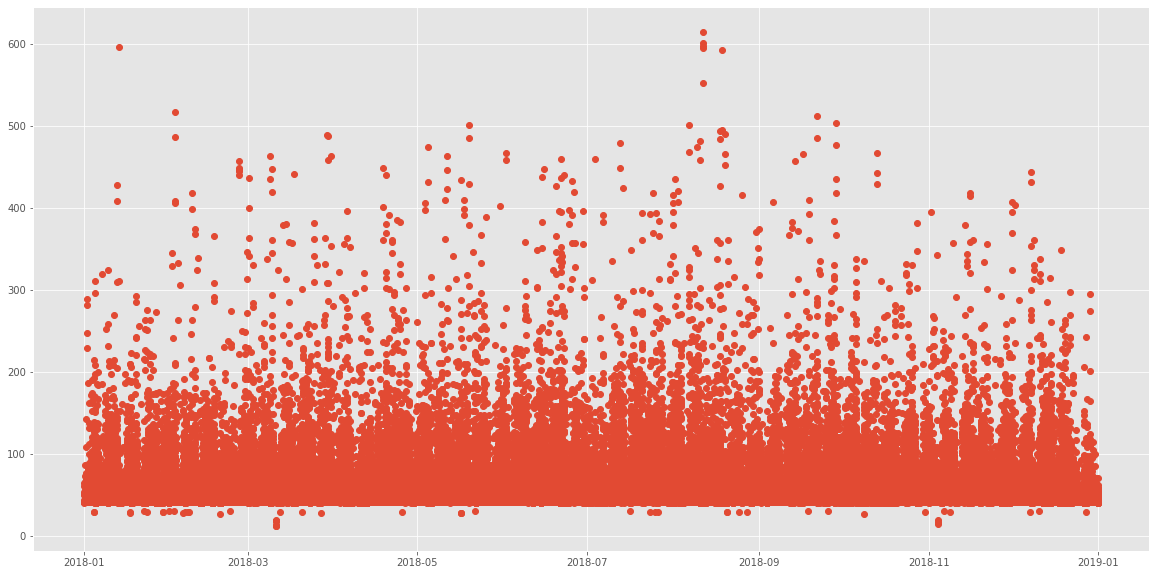

In [10]:
plt.figure(figsize=(20,10))
plt.plot_date(df_2018['StartTime(UTC)'], df_2018['Duration'])

In [11]:
df_2019 = df_graph[(dates>pd.Timestamp('2018-12-31').date()) & (dates<pd.Timestamp('2020-01-01'))]
df_2019.describe()

,Type,Severity,TMC,LocationLat,LocationLng,Distance(mi),Side,ZipCode,IsAnomaly,Duration
count,177082.00,177082.00,177082.00,177082.00,177082.00,177082.00,177082.00,176709.00,177082.00,177082.00
mean,3.00,1.79,73.25,47.45,-121.94,3.44,-0.65,98301.22,0.22,70.74
std,0.00,0.78,6.27,0.51,1.09,3.13,0.76,332.66,0.42,203.38
min,3.00,1.00,70.00,45.56,-124.55,0.00,-1.00,98001.00,0.00,16.00
25%,3.00,1.00,72.00,47.24,-122.33,1.50,-1.00,98055.00,0.00,42.00
50%,3.00,2.00,73.00,47.54,-122.26,2.69,-1.00,98155.00,0.00,49.00
75%,3.00,2.00,75.00,47.70,-122.14,4.28,-1.00,98404.00,0.00,71.00
max,3.00,3.00,1601.00,49.00,-117.04,98.56,1.00,99403.00,1.00,24615.00


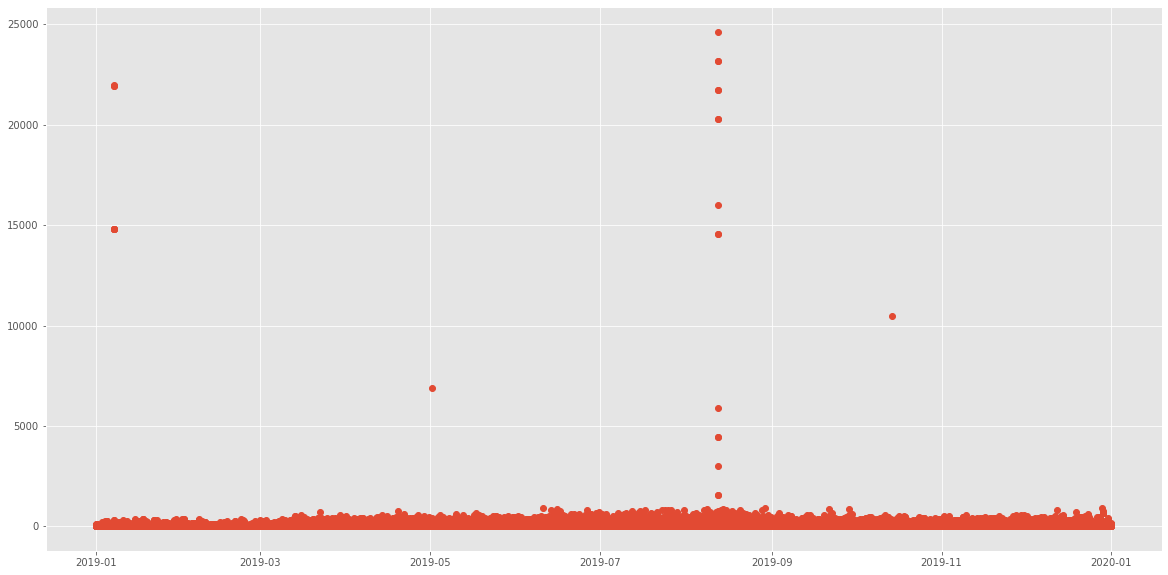

In [12]:
plt.figure(figsize=(20,10))
plt.plot_date(df_2019['StartTime(UTC)'], df_2019['Duration'])

### Train on 2017, 2018 data and test on 2019 data

In [13]:
df_2017.head()

,Type,Severity,TMC,StartTime(UTC),EndTime(UTC),LocationLat,LocationLng,Distance(mi),Side,ZipCode,IsAnomaly,Duration
13501,3,2,73,2017-01-01 00:13:00,2017-01-01 00:24:11,47.14,-122.29,1.42,1,98373.00,0,11
13502,3,3,70,2017-01-01 00:13:00,2017-01-01 00:24:11,47.67,-117.88,0.70,-1,99029.00,1,11
13503,3,2,72,2017-01-01 00:26:00,2017-01-01 00:44:12,47.24,-122.41,2.32,-1,98404.00,0,18
13504,3,3,71,2017-01-01 00:26:00,2017-01-01 00:44:12,47.68,-122.20,1.85,-1,98033.00,1,18
13505,3,2,72,2017-01-01 01:15:00,2017-01-01 01:28:12,47.20,-122.43,0.24,1,98408.00,0,13


In [14]:
df_2017_avg = df_2017[['StartTime(UTC)', 'Duration']]

In [15]:
df_2017_avg.set_index('StartTime(UTC)', inplace=True)

In [16]:
df_2017_avg.head()

,Duration
StartTime(UTC),
2017-01-01 00:13:00,11
2017-01-01 00:13:00,11
2017-01-01 00:26:00,18
2017-01-01 00:26:00,18
2017-01-01 01:15:00,13


In [17]:
df_2017_avg = pd.DataFrame(df_2017_avg.reset_index().groupby(pd.Grouper(key='StartTime(UTC)', freq='D'))['Duration'].mean())

In [18]:
df_2018_avg = df_2018[['StartTime(UTC)', 'Duration']]
df_2018_avg.set_index('StartTime(UTC)', inplace=True)
df_2018_avg = pd.DataFrame(df_2018_avg.reset_index().groupby(pd.Grouper(key='StartTime(UTC)', freq='D'))['Duration'].mean())

In [19]:
df_2019_avg = df_2019[['StartTime(UTC)', 'Duration']]
df_2019_avg.set_index('StartTime(UTC)', inplace=True)
df_2019_avg = pd.DataFrame(df_2019_avg.reset_index().groupby(pd.Grouper(key='StartTime(UTC)', freq='D'))['Duration'].mean())

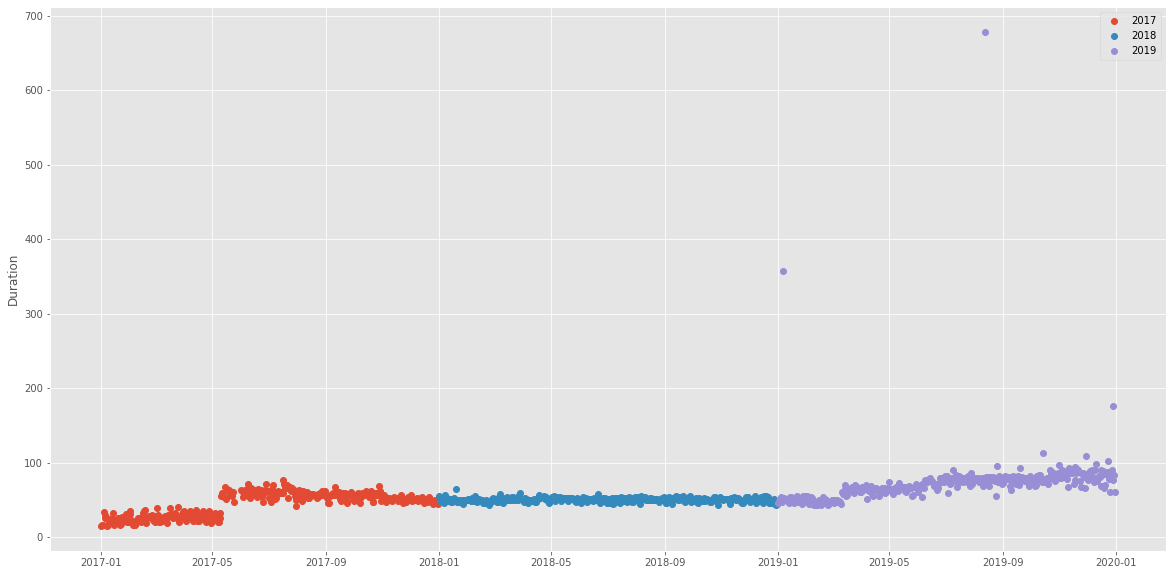

In [20]:
plt.figure(figsize=(20,10))
plt.plot_date(df_2017_avg.index, df_2017_avg['Duration'])
plt.plot_date(df_2018_avg.index, df_2018_avg['Duration'])
plt.plot_date(df_2019_avg.index, df_2019_avg['Duration'])
plt.ylabel('Duration')
plt.legend(['2017', '2018', '2019'])

In [99]:
df_17_18 = pd.concat([df_2017_avg, df_2018_avg])

In [100]:
df_17_18.head()

,Duration
StartTime(UTC),
2017-01-01,15.42
2017-01-02,16.79
2017-01-03,17.32
2017-01-04,33.89
2017-01-05,26.55


In [101]:
df_17_18.reset_index(inplace=True)

In [102]:
df_17_18['mnth_day'] = df_17_18['StartTime(UTC)'].apply(lambda x: x.strftime('%m-%d')) 

In [103]:
df_17_18.head()

,StartTime(UTC),Duration,mnth_day
0,2017-01-01,15.42,01-01
1,2017-01-02,16.79,01-02
2,2017-01-03,17.32,01-03
3,2017-01-04,33.89,01-04
4,2017-01-05,26.55,01-05


### Hourly Frequency for real-time app purposes

In [34]:
df_2017_hr = df_2017[['StartTime(UTC)', 'Duration']]
df_2017_hr.set_index('StartTime(UTC)', inplace=True)
df_2017_hr = pd.DataFrame(df_2017_avg.reset_index().groupby(pd.Grouper(key='StartTime(UTC)', freq='H'))['Duration'].mean())
df_2017_hr.fillna(0, inplace=True)

In [35]:
df_2018_hr = df_2018[['StartTime(UTC)', 'Duration']]
df_2018_hr.set_index('StartTime(UTC)', inplace=True)
df_2018_hr = pd.DataFrame(df_2018_avg.reset_index().groupby(pd.Grouper(key='StartTime(UTC)', freq='H'))['Duration'].mean())
df_2018_hr.fillna(0, inplace=True)

In [36]:
df_2019_hr = df_2019[['StartTime(UTC)', 'Duration']]
df_2019_hr.set_index('StartTime(UTC)', inplace=True)
df_2019_hr = pd.DataFrame(df_2019_avg.reset_index().groupby(pd.Grouper(key='StartTime(UTC)', freq='H'))['Duration'].mean())
df_2019_hr.fillna(0, inplace=True)

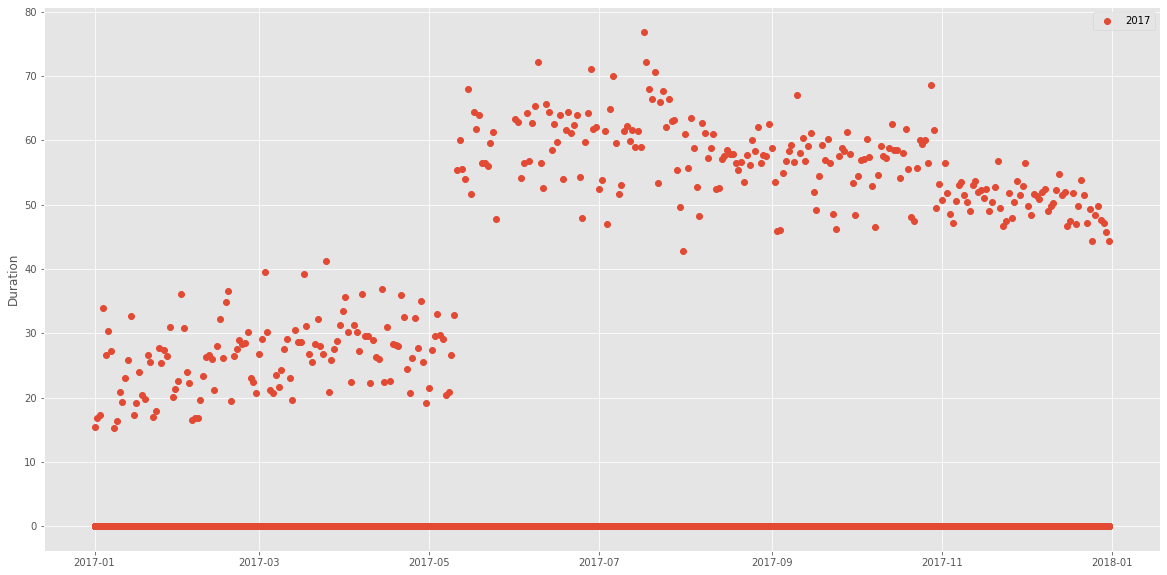

In [37]:
plt.figure(figsize=(20,10))
plt.plot_date(df_2017_hr.index, df_2017_hr['Duration'])

plt.ylabel('Duration')
plt.legend(['2017'])

In [104]:
df_17_18_hr = pd.concat([df_2017_hr, df_2018_hr])

In [105]:
df_17_18_hr.describe()

,Duration
count,17474.00
mean,2.00
std,9.88
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,76.89


In [106]:
df_17_18_hr.reset_index(inplace=True)

In [107]:
df_17_18_hr['mnth_day_time'] = df_17_18_hr['StartTime(UTC)'].apply(lambda x: x.strftime('%m-%d %H:%M:%S')) 

In [145]:
df_17_18_hr

,StartTime(UTC),Duration,mnth_day_time
0,2017-01-01 00:00:00,15.42,01-01 00:00:00
1,2017-01-01 01:00:00,0.00,01-01 01:00:00
2,2017-01-01 02:00:00,0.00,01-01 02:00:00
3,2017-01-01 03:00:00,0.00,01-01 03:00:00
4,2017-01-01 04:00:00,0.00,01-01 04:00:00
...,...,...,...
17469,2018-12-30 20:00:00,0.00,12-30 20:00:00
17470,2018-12-30 21:00:00,0.00,12-30 21:00:00
17471,2018-12-30 22:00:00,0.00,12-30 22:00:00
17472,2018-12-30 23:00:00,0.00,12-30 23:00:00


In [146]:
df_17_18_hr.to_csv('./data/WA_Cngstn_hourly.csv', index=False)

In [53]:
df_17_18_hr = pd.DataFrame(df_17_18_hr.groupby(['mnth_day_time'])['Duration'].mean())

Text(0, 0.5, 'Duration')

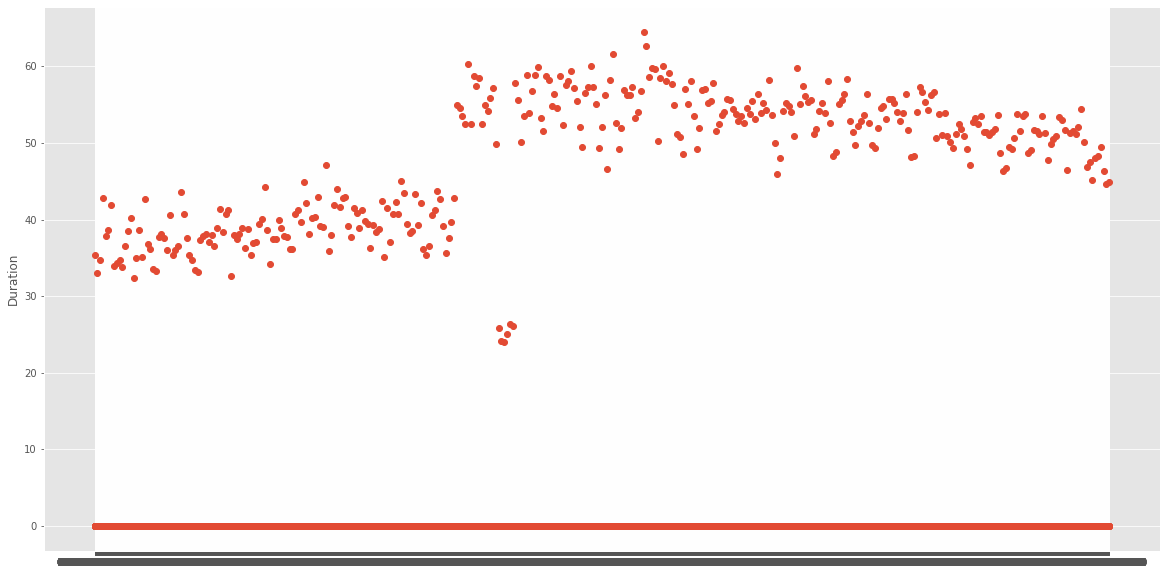

In [56]:
plt.figure(figsize=(20,10))
plt.plot_date(df_17_18_hr.index, df_17_18_hr['Duration'])

plt.ylabel('Duration')
# plt.legend(['2017'])

### quantile regression
upper (90th quantile)

In [94]:
import re
import os
import tqdm
import random
import datetime
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras.backend as K

In [74]:
df = df_17_18_hr.reset_index(drop=True)
df.head()

,StartTime(UTC),Duration,mnth_day_time
0,2017-01-01 00:00:00,15.42,01-01 00:00:00
1,2017-01-01 01:00:00,0.00,01-01 01:00:00
2,2017-01-01 02:00:00,0.00,01-01 02:00:00
3,2017-01-01 03:00:00,0.00,01-01 03:00:00
4,2017-01-01 04:00:00,0.00,01-01 04:00:00


In [75]:
df['timestamp'] = pd.to_datetime(df['StartTime(UTC)'])
# df['yr'] = df.timestamp.dt.year
df['mt'] = df.timestamp.dt.month
df['d'] = df.timestamp.dt.day
df['H'] = df.timestamp.dt.hour

In [76]:
df.head()

,StartTime(UTC),Duration,mnth_day_time,timestamp,mt,d,H
0,2017-01-01 00:00:00,15.42,01-01 00:00:00,2017-01-01 00:00:00,1,1,0
1,2017-01-01 01:00:00,0.00,01-01 01:00:00,2017-01-01 01:00:00,1,1,1
2,2017-01-01 02:00:00,0.00,01-01 02:00:00,2017-01-01 02:00:00,1,1,2
3,2017-01-01 03:00:00,0.00,01-01 03:00:00,2017-01-01 03:00:00,1,1,3
4,2017-01-01 04:00:00,0.00,01-01 04:00:00,2017-01-01 04:00:00,1,1,4


In [77]:
df = df[['timestamp', 'Duration', 'mt', 'd', 'H']]

In [78]:
df.head()

,timestamp,Duration,mt,d,H
0,2017-01-01 00:00:00,15.42,1,1,0
1,2017-01-01 01:00:00,0.00,1,1,1
2,2017-01-01 02:00:00,0.00,1,1,2
3,2017-01-01 03:00:00,0.00,1,1,3
4,2017-01-01 04:00:00,0.00,1,1,4


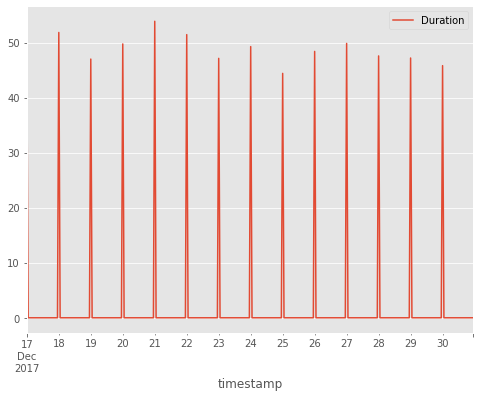

In [79]:
### PLOT SAMPLE OF DATA ###

df.iloc[8400:8400+7*48,:].plot(y='Duration', x='timestamp', figsize=(8,6))

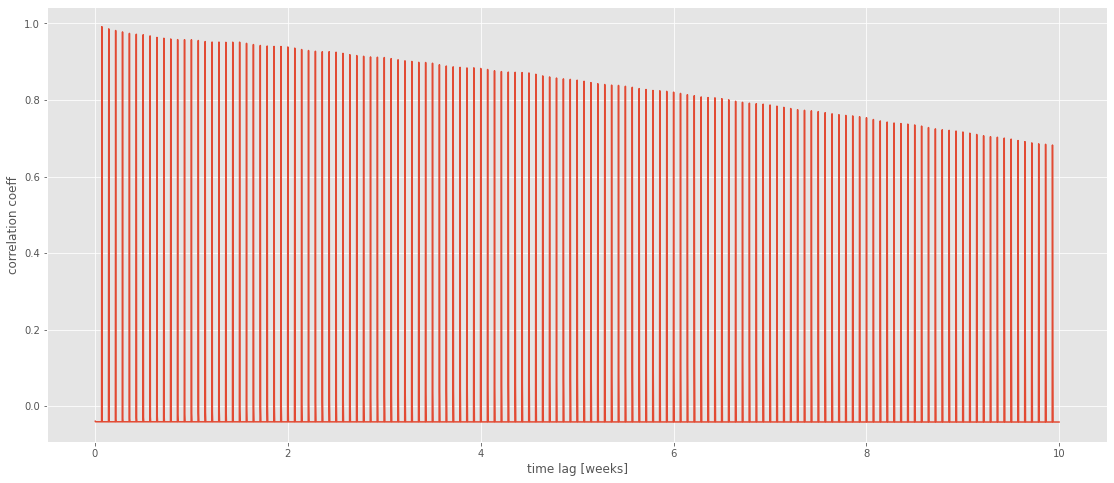

In [80]:
### WEEKLY AUTOCORR PLOT (10 WEEKS DEPTH) ###

timeLags = np.arange(1,10*48*7)
autoCorr = [df.Duration.autocorr(lag=dt) for dt in timeLags]

plt.figure(figsize=(19,8))
plt.plot(1.0/(48*7)*timeLags, autoCorr);
plt.xlabel('time lag [weeks]'); plt.ylabel('correlation coeff', fontsize=12);

In [85]:
### CREATE WEEKDAY FEATURE AND COMPUTE THE MEAN FOR WEEKDAYS AT EVERY HOURS ###

df['weekday'] = df.timestamp.dt.weekday
df['weekday_hour'] = df.weekday.astype(str) +' '+ df.H.astype(str)
df['m_weekday'] = df.weekday_hour.replace(df[:5000].groupby('weekday_hour')['Duration'].mean().to_dict())

In [88]:
### CREATE GENERATOR FOR LSTM ###

sequence_length = 48

def gen_index(id_df, seq_length, seq_cols):

    data_matrix =  id_df[seq_cols]
    num_elements = data_matrix.shape[0]

    for start, stop in zip(range(0, num_elements-seq_length, 1), range(seq_length, num_elements, 1)):
        
        yield data_matrix[stop-sequence_length:stop].values.reshape((-1,len(seq_cols)))

In [89]:
### CREATE AND STANDARDIZE DATA FOR LSTM ### 

cnt, mean = [], []
for sequence in gen_index(df, sequence_length, ['Duration']):
    cnt.append(sequence)
    
for sequence in gen_index(df, sequence_length, ['m_weekday']):
    mean.append(sequence)

cnt, mean = np.log(cnt), np.log(mean)
cnt = cnt - mean
cnt.shape

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


(17426, 48, 1)

In [90]:
### CREATE AND STANDARDIZE LABEL FOR LSTM ###

init = df.m_weekday[sequence_length:].apply(np.log).values
label = df.Duration[sequence_length:].apply(np.log).values - init
label.shape

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


(17426,)

In [91]:
### DEFINE QUANTILE LOSS ###

def q_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [92]:
### TRAIN TEST SPLIT ###

X_train, X_test = cnt[:5000], cnt[5000:]
y_train, y_test = label[:5000], label[5000:]
train_date, test_date = df.timestamp.values[sequence_length:5000+sequence_length], df.timestamp.values[5000+sequence_length:]

In [95]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


### CREATE MODEL ###
losses = [lambda y,f: q_loss(0.1,y,f), lambda y,f: q_loss(0.5,y,f), lambda y,f: q_loss(0.9,y,f)]

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3))(inputs, training = True)
lstm = Bidirectional(LSTM(16, return_sequences=False, dropout=0.3))(lstm, training = True)
dense = Dense(50)(lstm)
out10 = Dense(1)(dense)
out50 = Dense(1)(dense)
out90 = Dense(1)(dense)
model = Model(inputs, [out10,out50,out90])

model.compile(loss=losses, optimizer='adam', loss_weights = [0.3,0.3,0.3])
model.fit(X_train, [y_train,y_train,y_train], epochs=50, batch_size=128, verbose=2)

Train on 5000 samples
Epoch 1/50


UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[model/bidirectional/forward_lstm/StatefulPartitionedCall]] [Op:__inference_distributed_function_12934]

Function call stack:
distributed_function -> distributed_function -> distributed_function


##### mxnet

In [98]:
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import mxnet as mx
from mxnet import nd, autograd, gluon
 
from sklearn import preprocessing
from sklearn.metrics import f1_score

In [111]:
df_17_18_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17474 entries, 0 to 17473
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   StartTime(UTC)  17474 non-null  datetime64[ns]
 1   Duration        17474 non-null  float64       
 2   mnth_day_time   17474 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 409.7+ KB


In [112]:
df = df_17_18_hr.drop('mnth_day_time', axis=1)

In [113]:
df.head()

,StartTime(UTC),Duration
0,2017-01-01 00:00:00,15.42
1,2017-01-01 01:00:00,0.00
2,2017-01-01 02:00:00,0.00
3,2017-01-01 03:00:00,0.00
4,2017-01-01 04:00:00,0.00


In [119]:
training_data = df.copy()

In [122]:
features = ['Duration']
feature_count = len(features)

In [123]:
rows = len(training_data)
split_factor = 0.8
training = training_data[0:int(rows * split_factor)]
validation = training_data[int(rows * split_factor):]

In [135]:
training

,StartTime(UTC),Duration
0,2017-01-01 00:00:00,15.42
1,2017-01-01 01:00:00,0.00
2,2017-01-01 02:00:00,0.00
3,2017-01-01 03:00:00,0.00
4,2017-01-01 04:00:00,0.00
...,...,...
13974,2018-08-07 05:00:00,0.00
13975,2018-08-07 06:00:00,0.00
13976,2018-08-07 07:00:00,0.00
13977,2018-08-07 08:00:00,0.00


In [136]:
model = mx.gluon.nn.Sequential()
with model.name_scope():
    model.add(mx.gluon.rnn.LSTM(feature_count))
    model.add(mx.gluon.nn.Dense(feature_count, activation='relu'))

In [137]:
L = gluon.loss.L2Loss()
def evaluate_accuracy(data_iterator, model, L):
    loss_avg = 0.
    for i, data in enumerate(data_iterator):
        data = data.as_in_context(ctx).reshape((-1, 1, feature_count))
        output = model(data)
        loss = L(output, data)
        loss_avg = (loss_avg * i + nd.mean(loss).asscalar()) / (i + 1)
    return loss_avg

In [138]:
ctx = mx.cpu()

In [139]:
batch_size = 1000
training_data_batches = mx.gluon.data.DataLoader(
    training, batch_size, shuffle=False)
validation_data_batches = mx.gluon.data.DataLoader(
    validation, batch_size, shuffle=False)

In [143]:
training_data_batches

In [140]:
model.collect_params().initialize(mx.init.Xavier(), ctx=ctx)
trainer = gluon.Trainer(model.collect_params(), 'sgd', {'learning_rate': 0.01})

In [144]:
epochs = 15
training_mse = []
validation_mse = []
for epoch in range(epochs):
    print(str(epoch+1))
for i, data in enumerate(training_data_batches):
    data = data.as_in_context(ctx).reshape((-1, 1, feature_count))
with autograd.record():
    output = model(data)
    loss = L(output, data)
    loss.backward()
    trainer.step(batch_size)
    training_mse.append(evaluate_accuracy(training_data_batches, model, L))
    validation_mse.append(evaluate_accuracy(validation_data_batches, model, L))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


KeyError: 0